In [1]:
import projectconfig as cfg
import churn_library as cls

In [2]:
encoded_data = cls.DataEncoding()
encoded_data.import_data(cfg.data_file_path)
encoded_data.clean_data('Churn')

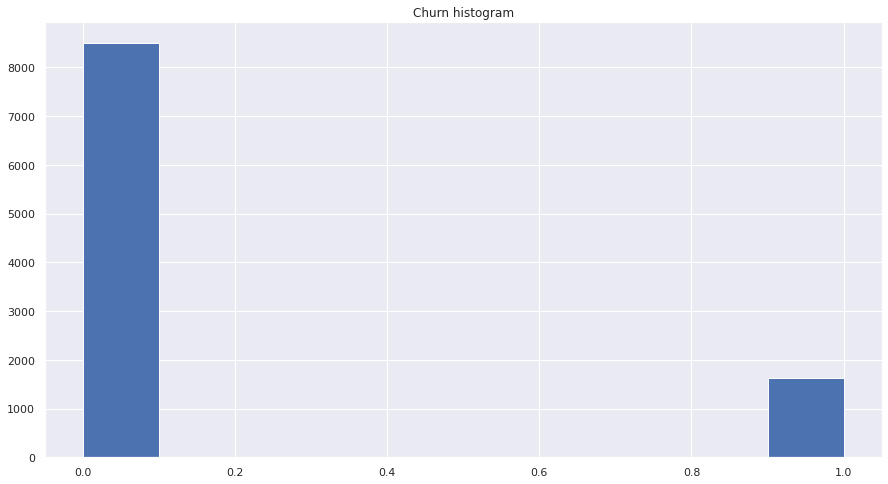

In [5]:
eda = cls.MyFigure(figsize=(15, 8))
eda.plot_histogram(
        encoded_data.data,
        'Churn',
        'Churn histogram')
eda.clf()

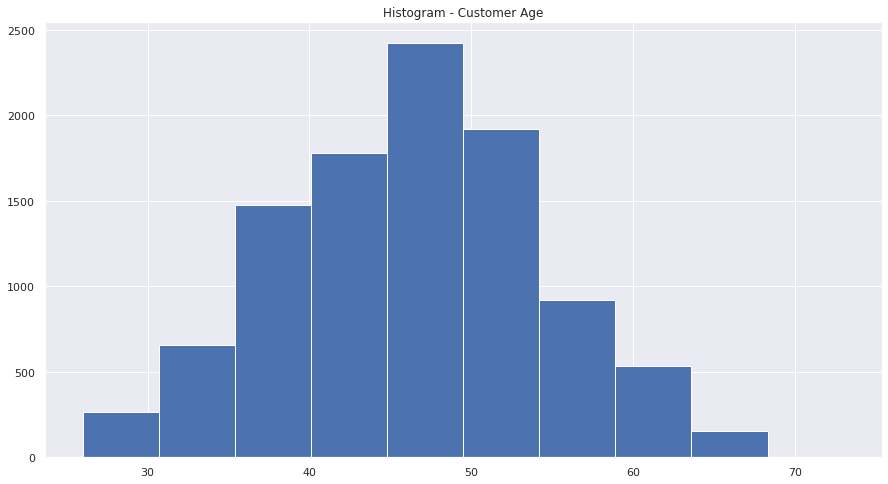

In [6]:
eda = cls.MyFigure(figsize=(15, 8))
eda.plot_histogram(
        encoded_data.data,
        'Customer_Age',
        "Histogram - Customer Age")
eda.clf()

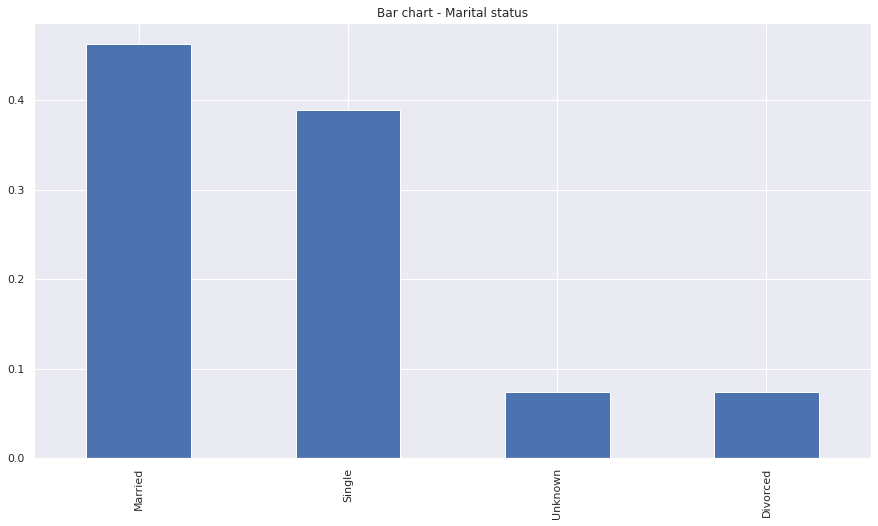

In [7]:
eda = cls.MyFigure(figsize=(15, 8))
eda.plot_chart(
        encoded_data.data,
        'Marital_Status',
        "Bar chart - Marital status",
        'bar')
eda.clf()

<Figure size 1080x576 with 0 Axes>

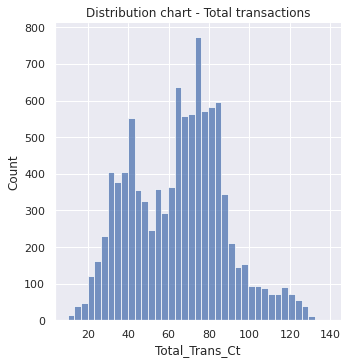

In [8]:
eda = cls.MyFigure(figsize=(15, 8))
eda.plot_distribution_chart(
        encoded_data.data,
        'Total_Trans_Ct',
        "Distribution chart - Total transactions")
eda.clf()

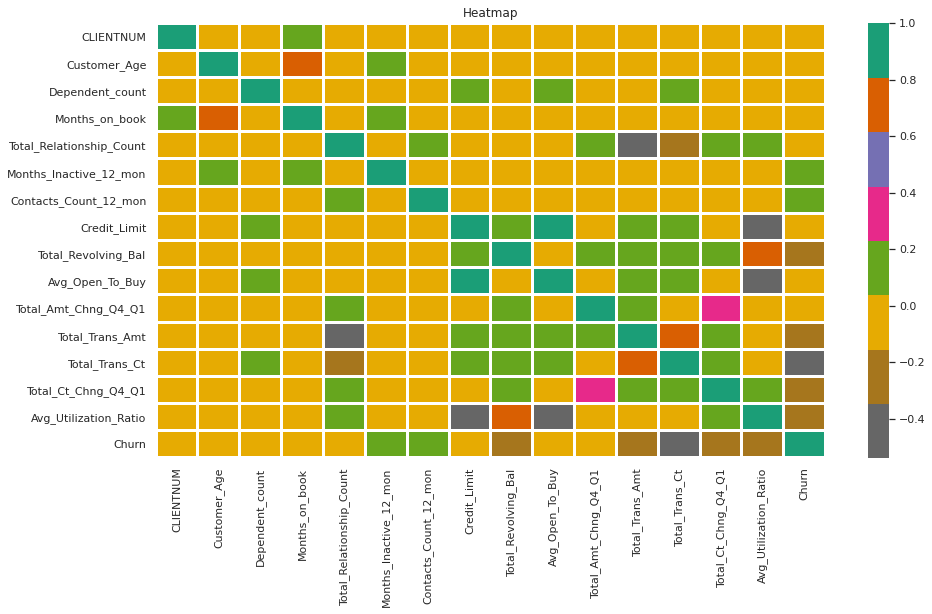

In [9]:
eda = cls.MyFigure(figsize=(15, 8))
eda.plot_heatmap(encoded_data.data, 'Heatmap')
eda.clf()

In [10]:
encoded_data.encoder_helper(cfg.cat_columns, cfg.keep_columns, 'Churn')
featured_data = cls.FeatureEngineering()
featured_data.engineering(encoded_data.X, encoded_data.y)

In [11]:
model_lr = cls.MyLogisticRegression()
model_lr.fit(featured_data.X_train, featured_data.y_train)
y_train_preds, y_test_preds = model_lr.predict(
        featured_data.X_train, featured_data.X_test, is_best_estimator=False)
#model_lr.save_model(cfg.lr_model)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


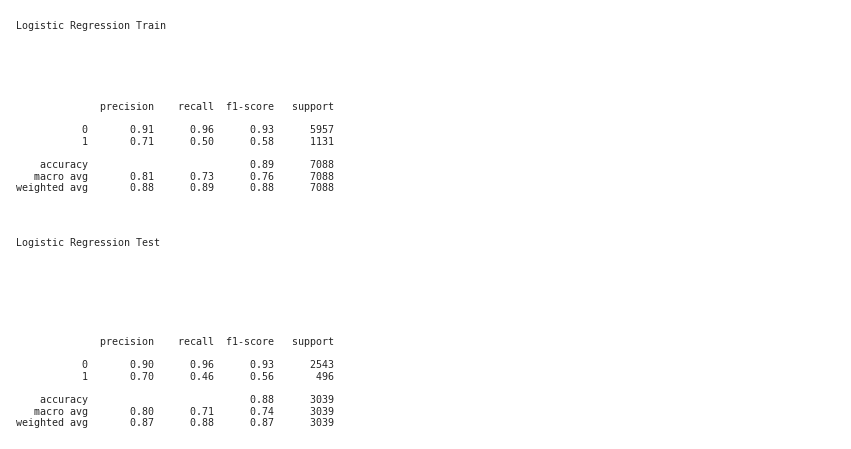

In [13]:
fig = cls.MyFigure(figsize=(15, 8))
fig.classification_report(
        model_lr.name,
        featured_data.y_train,
        featured_data.y_test,
        y_train_preds,
        y_test_preds)
fig.clf()

In [14]:
param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [4, 5, 100],
        'criterion': ['gini', 'entropy']
    }
# Declare model
model_rfc = cls.MyRandomForestClassifier(param_grid)
# Fit model
model_rfc.fit(featured_data.X_train, featured_data.y_train)
# Predict model
y_train_preds, y_test_preds = model_rfc.predict(
featured_data.X_train, featured_data.X_test, is_best_estimator=True)
#model_rfc.save_model(cfg.rfc_model)

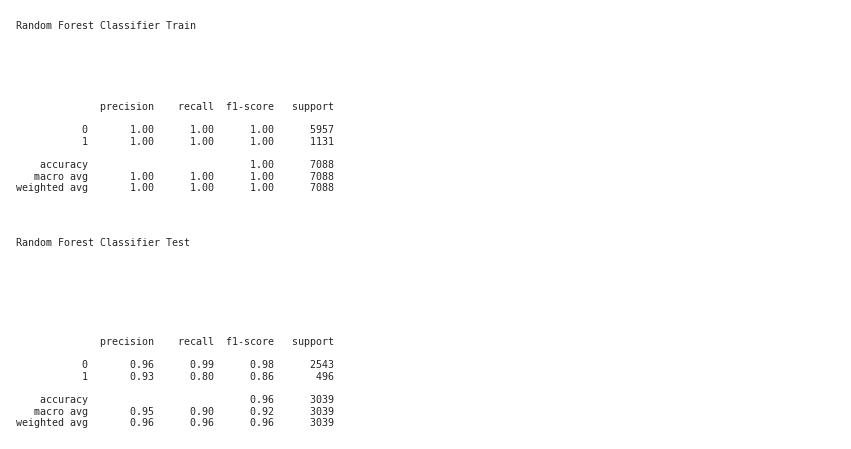

In [15]:
fig = cls.MyFigure(figsize=(15, 8))
fig.classification_report(
        model_rfc.name,
        featured_data.y_train,
        featured_data.y_test,
        y_train_preds,
        y_test_preds)
fig.clf()

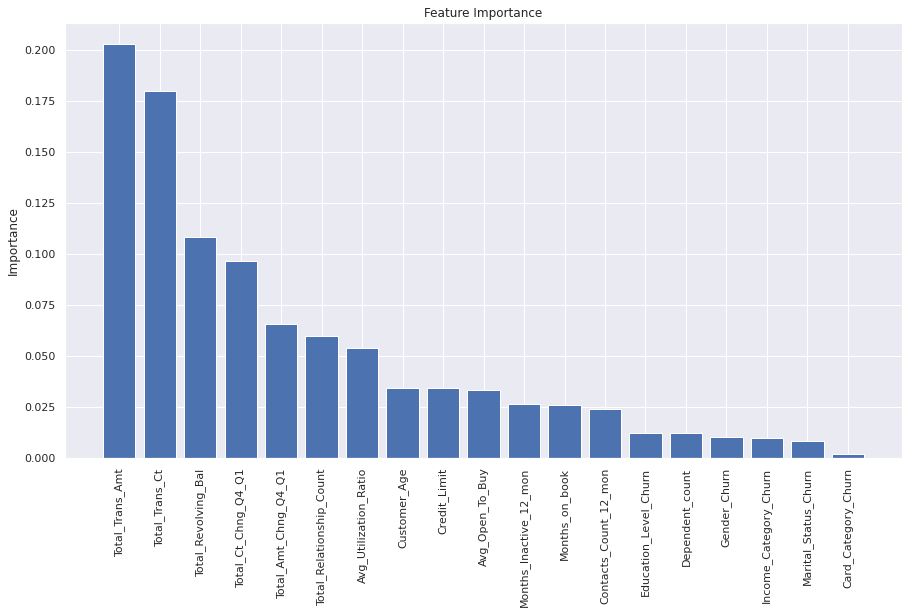

In [16]:
# Feature importances plot
fig = cls.MyFigure(figsize=(15, 8))
fig.feature_importances(
        model_rfc.model,
        encoded_data.X)
fig.clf()

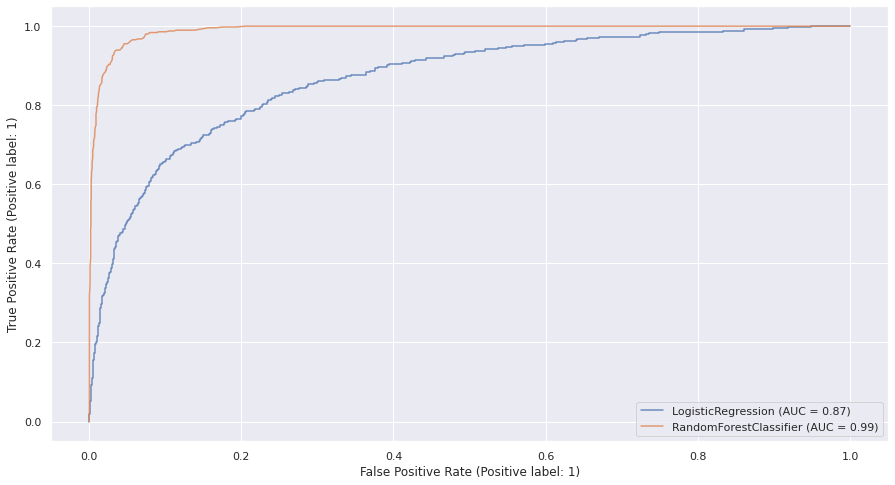

In [17]:
fig = cls.MyFigure(figsize=(15, 8))
fig.roc_curve_plot(
        model_lr.model,
        model_rfc.model.best_estimator_,
        featured_data.X_test,
        featured_data.y_test)
fig.clf()

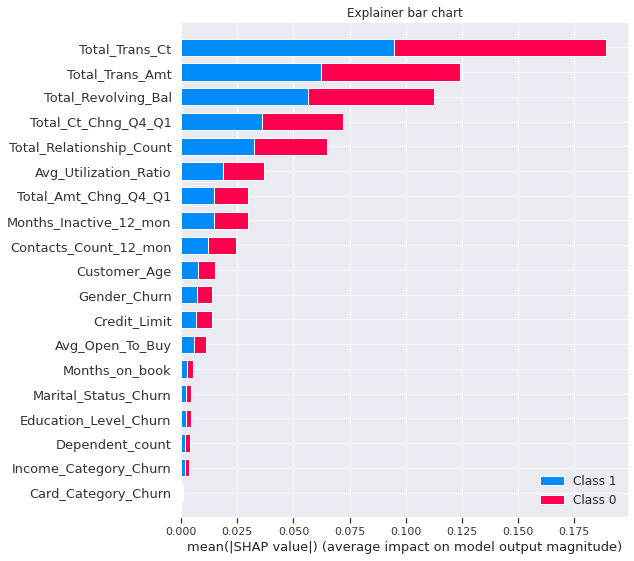

In [18]:
fig = cls.MyFigure(figsize=(15, 8))
fig.explainer_plot(
        model_rfc.model,
        featured_data.X_test,
        "bar")
fig.clf()